<a href="https://colab.research.google.com/github/Priyadarshini-yadav13/Miniproject_DL_regression/blob/main/Mini_project_deeplearning_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#There is a dataset on insurance on which we need to make a optimal model...
since in this dataset target variable is numerical so we will use regression model.

In [4]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics

In [5]:
#loading the data
df=pd.read_csv('/content/insurance .csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#Getting an idea about duplicates
df.duplicated().sum()

np.int64(1)

In [ ]:
#np.int64(1) means there is one duplicate value.

In [7]:
#Dropping the duplicates rows
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
## np.int64(0) means that there are no dupicate rows in the dataset.

In [10]:
#seprating the data
X=df.drop('charges',axis=1)
y=df['charges']

In [11]:
#Getting the list of columns
print(X.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [12]:
#Getting the list of categorical column and numerical column
categorical=['sex', 'smoker', 'region']
numerical=['age', 'bmi', 'children']

In [13]:
#preprocessing columns
preprocessor=ColumnTransformer([('num',StandardScaler(),numerical),
                                ('cat',OneHotEncoder(drop="first"),categorical)])

In [14]:
#Splitting the data into train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)


In [15]:
#preprocessing the data
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [16]:
#Baseline ANN Model
model_base=Sequential([
    Dense(8,input_dim=X_train.shape[1],activation='relu'),
    Dense(1)
])

In [17]:
#compiling the model
model_base.compile(loss='mse',optimizer='adam',metrics=["r2_score"])

In [18]:
#Training the model
history_base=model_base.fit(X_train,y_train,validation_split=0.2,epochs=100,verbose=1)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 334210624.0000 - r2_score: -1.2287 - val_loss: 364963168.0000 - val_r2_score: -1.1446
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 310410848.0000 - r2_score: -1.2608 - val_loss: 364955168.0000 - val_r2_score: -1.1446
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 301518528.0000 - r2_score: -1.2454 - val_loss: 364946720.0000 - val_r2_score: -1.1445
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 308640896.0000 - r2_score: -1.1862 - val_loss: 364937824.0000 - val_r2_score: -1.1445
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 318897856.0000 - r2_score: -1.2403 - val_loss: 364927840.0000 - val_r2_score: -1.1444
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 297106016.0000 - r2_score: -1.2442 - val_loss: 364916608.0000 - val_r2_score: -1.1444
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 348188320.0000 - r2_score: -1.2660 - val_loss: 364904224.0000 - val_r2

In [19]:
#model evaluation
loss_base=model_base.evaluate(X_test,y_test)
print(f'Loss(MSE):{loss_base}')
print(f'R2 Score:{"r2_score"}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 315270816.0000 - r2_score: -1.1632
Loss(MSE):[312731200.0, -1.1168911457061768]
R2 Score:r2_score


In [20]:
#Negative value means that if we would have given average value as predicted value for every data point,
it would have been better than creating the model.

SyntaxError: invalid syntax (ipython-input-370691056.py, line 2)

In [21]:
#optimizing ANN model
from tensorflow.keras.layers import Dropout
#optimized model with dropouts
model_opt=Sequential([
    Dense(128,input_dim=X_train.shape[1],activation='relu'),
    Dropout(0.3),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.1),
    Dense(1)
])

In [22]:
#Compiling the model
model_opt.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=tf.keras.losses.MeanSquaredError(),metrics=["r2_score"])

In [23]:
#Early stopping
early_stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [24]:
#training the model
history_opt=model_opt.fit(X_train,y_train,validation_split=0.2,epochs=100,batch_size=32,callbacks=[early_stopping],verbose=1)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 325697376.0000 - r2_score: -1.1949 - val_loss: 364783520.0000 - val_r2_score: -1.1436
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 297647424.0000 - r2_score: -1.2092 - val_loss: 363798784.0000 - val_r2_score: -1.1378
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 299282432.0000 - r2_score: -1.2178 - val_loss: 359545056.0000 - val_r2_score: -1.1128
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 321323872.0000 - r2_score: -1.3029 - val_loss: 346400480.0000 - val_r2_score: -1.0355
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 283410080.0000 - r2_score: -1.0881 - val_loss: 316104448.0000 - val_r2_score: -0.8575
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 287411616.0000 - r2_score: -0.8339 - val_loss: 261034640.0000 - val_r2_score: -0.5339
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 197492112.0000 - r2_score: -0.4621 - val_loss: 190554272.0000 - val_r2

In [25]:
#evaluating the model
train_loss_opt, train_r2_opt = model_opt.evaluate(X_train, y_train)
print(f'Training Loss (MSE): {train_loss_opt}')
print(f'Training R2 Score: {train_r2_opt}')

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24237406.0000 - r2_score: 0.8188
Training Loss (MSE): 25966316.0
Training R2 Score: 0.8224419951438904


In [26]:
#evaluating the model
test_loss_opt, test_r2_opt = model_opt.evaluate(X_test, y_test)
print(f'Testing Loss (MSE): {test_loss_opt}')
print(f'Testing R2 Score: {test_r2_opt}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31511920.0000 - r2_score: 0.7835 
Testing Loss (MSE): 33513216.0
Testing R2 Score: 0.7731475830078125


In [ ]:
#Comments-->
1)Both training and testing r2score are within 5% of each other.
2)Both training and testing loss are above 0.78
Hence we can say the model looks optimal.


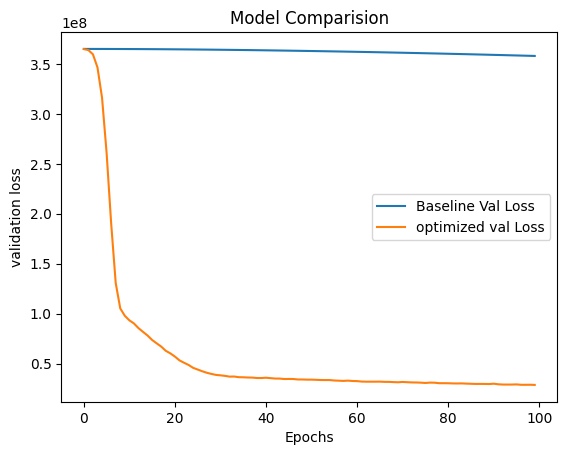

In [27]:
#compare learning curve
plt.plot(history_base.history['val_loss'],label='Baseline Val Loss')
plt.plot(history_opt.history['val_loss'],label='optimized val Loss')
plt.xlabel('Epochs')
plt.ylabel('validation loss')
plt.title('Model Comparision')
plt.legend()
plt.show()

In [28]:
# Predictions
# Example from test set
sample = X_test[0].reshape(1, -1)
predicted_charge = model_opt.predict(sample)
print(f'Predicted Charge: {predicted_charge}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted Charge: [[8609.61]]


In [29]:
#custom input example
custom_data=pd.DataFrame({
    'age'    : [35],
    'sex'    : ['male'],
    'bmi'    : [20],
    'children' : [2],
    'smoker' : ['no'],
    'region' : ['southeast']
})
custom_processed=preprocessor.transform(custom_data)
predicted_charge=model_opt.predict(custom_processed)
print(f'Predicted Charge:{predicted_charge}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Charge:[[7323.3457]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


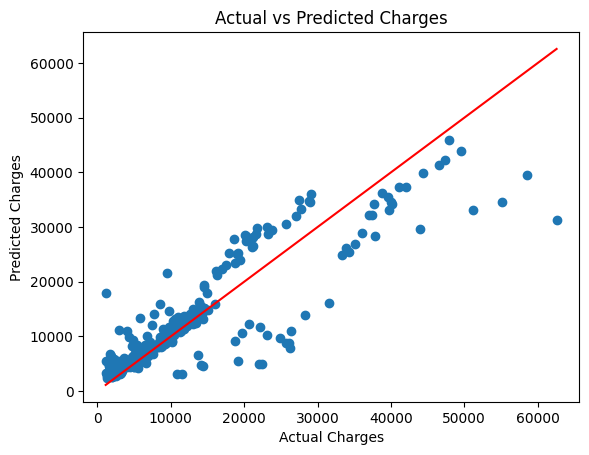

In [31]:
# Actual vs Predicted Plot
y_pred = model_opt.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
plt.show()